In [21]:
import pandas as pd 
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
import seaborn as sns

In [2]:
# loading the china debt trap dataset to a pandas dataframe
china_dept_trap_dataset  = pd.read_csv("D:\github\china_debt_trap_analysis\china_dept_trap.csv")

In [3]:
china_dept_trap_dataset.head()

,Expand All | Collapse All,YEAR,AMOUNT,LENDER,BORROWER,SECTOR,SENSITIVE TERRITORY OVERLAP,Country
0,"“Lar Patriota"" Infrastructure (Phase 1)",2011,$50M,CDB,Government,Transport,None Known,Angola
1,"10-Year Oil Supply Plan (10Mt/Year), ""Oil for ...",2009,$7.0B,CDB,Petrobras,"Extraction, pipelines",None Known,Brazil
2,1000 housing project,2012,$47M,ExImBank,Government,Government,None Known,Suriname
3,115kV Transmission Line and Substation from Ph...,2009,$475M,ExImBank,Electricite Du Cambodge,Power,None Known,Cambodia
4,151 Multisector infrastructure projects,2016,$600M,CDB,Central Bank of Kenya,Mulit-sector/discretionary,None Known,Kenya


Getting number of rows and columns present in the dataset

In [4]:
china_dept_trap_dataset.shape

(858, 8)

In [5]:
china_dept_trap_dataset.isnull().sum()

Expand All | Collapse All      0
YEAR                           0
AMOUNT                         0
LENDER                         0
BORROWER                       1
SECTOR                         0
SENSITIVE TERRITORY OVERLAP    0
Country                        0
dtype: int64

In [6]:
china_dept_trap_dataset.drop_duplicates(inplace=True)

Count the number of observations in each category of the 'SECTOR' variable

In [7]:
sector_counts = china_dept_trap_dataset['SECTOR'].value_counts()
print(sector_counts)

Transport                     316
Power                         203
Government                    138
Telecom                        63
Extraction, pipelines          38
Mulit-sector/discretionary     31
Other construction             29
Agriculture, food              27
Manufacturing                  12
fTransport                      1
Name: SECTOR, dtype: int64


Create a bar chart of the frequencies of the 'LENDER' variable

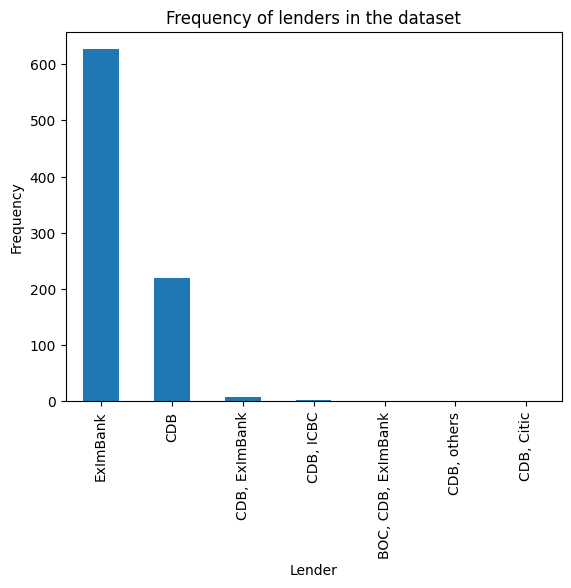

In [8]:
lender_counts = china_dept_trap_dataset['LENDER'].value_counts()
lender_counts.plot(kind='bar')
plt.xlabel('Lender')
plt.ylabel('Frequency')
plt.title('Frequency of lenders in the dataset')
plt.show()

Create a bar plot of the frequency of each sector

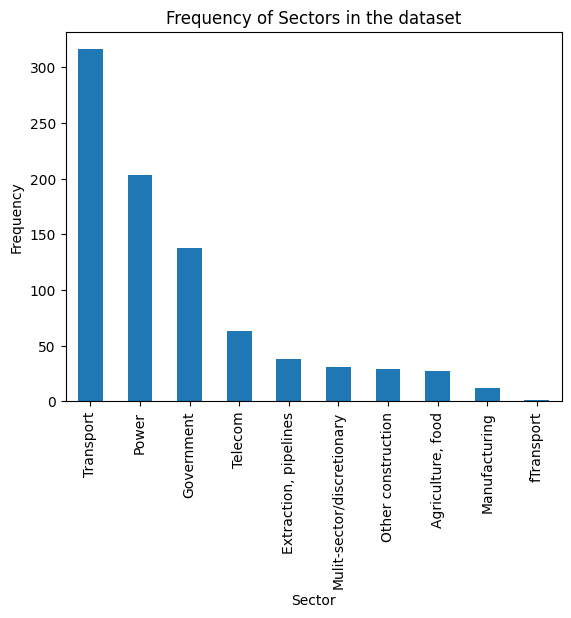

In [9]:
sector_counts = china_dept_trap_dataset['SECTOR'].value_counts()
sector_counts.plot(kind='bar')
plt.xlabel('Sector')
plt.ylabel('Frequency')
plt.title('Frequency of Sectors in the dataset')
plt.show()

Create a contingency table of the 'LENDER' and 'BORROWER' variables

In [10]:
ct = pd.crosstab(china_dept_trap_dataset['LENDER'], china_dept_trap_dataset['BORROWER'])

In [11]:
print(ct)

BORROWER            Africa Finance Corporation  African Export Import Bank  \
LENDER                                                                       
BOC, CDB, ExImBank                           0                           0   
CDB                                          0                           1   
CDB, Citic                                   0                           0   
CDB, ExImBank                                0                           0   
CDB, ICBC                                    0                           0   
CDB, others                                  0                           0   
ExImBank                                     2                           1   

BORROWER            African Export-Import Bank  Attarat Power Company (APCO)  \
LENDER                                                                         
BOC, CDB, ExImBank                           0                             0   
CDB                                          0           

Perform a chi-squared test of independence on the contingency table

In [12]:
chi2, p, dof, expected = chi2_contingency(ct)
print('Chi-squared statistic:', chi2)
print('P-value:', p)

Chi-squared statistic: 1446.8656860345016
P-value: 4.717189073260366e-52


Create a contingency table of the 'AMOUNT' and 'SECTOR' variables

In [13]:
ct1 = pd.crosstab(china_dept_trap_dataset['AMOUNT'], china_dept_trap_dataset['SECTOR'])

In [14]:
print(ct1)

SECTOR  Agriculture, food  Extraction, pipelines  Government  Manufacturing  \
AMOUNT                                                                        
$1.0B                   0                      0           0              0   
$1.1B                   0                      0           0              2   
$1.2B                   1                      1           1              1   
$1.3B                   0                      1           0              1   
$1.4B                   0                      1           0              0   
...                   ...                    ...         ...            ...   
$989M                   0                      0           0              0   
$98M                    0                      0           0              0   
$995M                   0                      0           0              0   
$998M                   0                      0           0              0   
$99M                    0                      0    

Perform a chi-squared test of independence on the contingency table

In [15]:
chi2, p, dof, expected = chi2_contingency(ct1)
print('Chi-squared statistic:', chi2)
print('P-value:', p)

Chi-squared statistic: 2892.6786642124257
P-value: 0.9970183060515696


Create a contingency table of the 'AMOUNT' and 'Country' variables

In [16]:
ct2 = pd.crosstab(china_dept_trap_dataset['AMOUNT'], china_dept_trap_dataset['Country'])

Perform a chi-squared test of independence on the contingency table

In [17]:
chi2, p, dof, expected = chi2_contingency(ct2)
print('Chi-squared statistic:', chi2)
print('P-value:', p)

Chi-squared statistic: 32662.10822342581
P-value: 0.011685739087627371


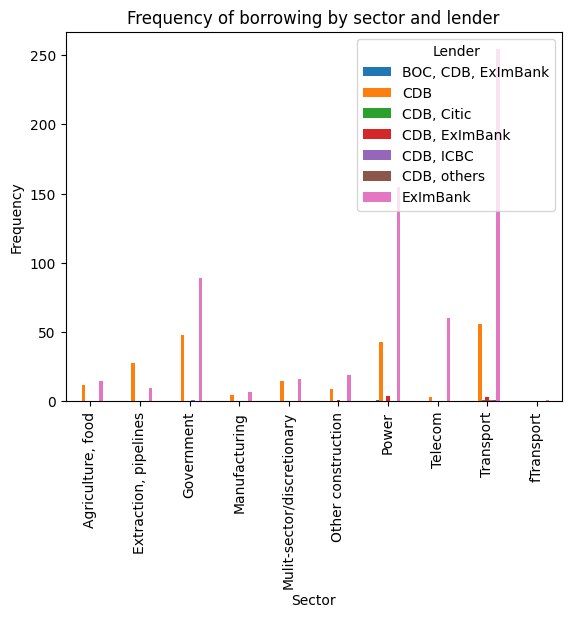

In [24]:
# Create a contingency table of the 'SECTOR' and 'LENDER' variables
ct3 = pd.crosstab(china_dept_trap_dataset['SECTOR'], china_dept_trap_dataset['LENDER'])

# Create a grouped bar chart of the contingency table
ct3.plot(kind='bar')
plt.xlabel('Sector')
plt.ylabel('Frequency')
plt.title('Frequency of borrowing by sector and lender')
plt.legend(title='Lender', loc='upper right')
plt.show()

Create a pie chart of the frequency of each lender

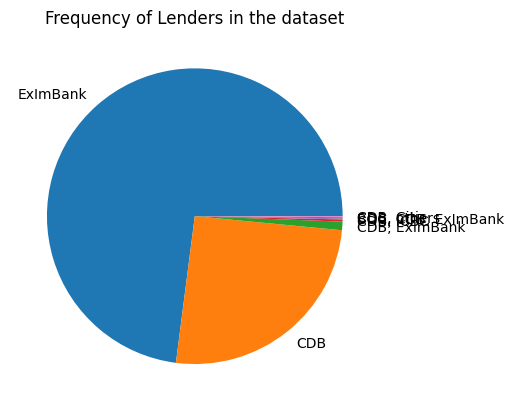

In [18]:
lender_counts = china_dept_trap_dataset['LENDER'].value_counts()
lender_counts.plot(kind='pie')
plt.ylabel('')
plt.title('Frequency of Lenders in the dataset')
plt.show()

Create a pie chart of the frequency of each sector

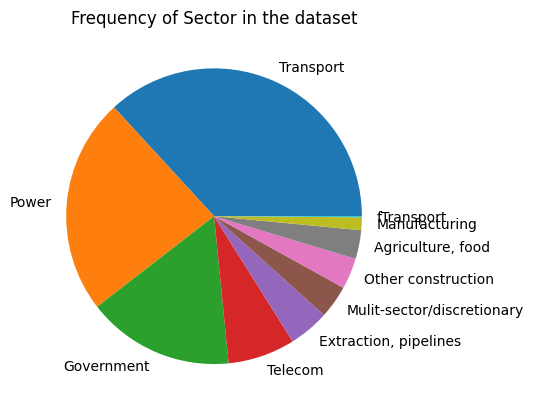

In [19]:
sector_counts = ['SECTOR'].value_counts()
sector_counts.plot(kind='pie'china_dept_trap_dataset)
plt.ylabel('')
plt.title('Frequency of Sector in the dataset')
plt.show()